In [91]:
import os
import sys
import yaml
import tifffile
from pathlib import Path

import numpy as np

import SimpleITK as sitk
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))

In [92]:
data_path = Path('../data/')

In [102]:
vol = tifffile.imread(data_path / '1099.tif')
label = tifffile.imread(data_path / '1099_brain.tif')

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


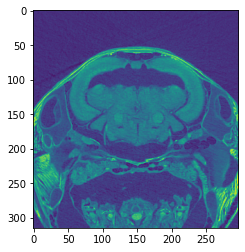

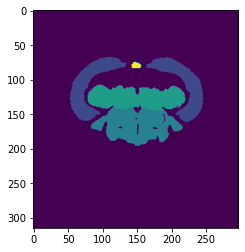

uint8
uint8


In [103]:
slice_num = 250

plt.imshow(vol[slice_num])
plt.show()

plt.imshow(label[slice_num])
plt.show()

print(vol.dtype)
print(label.dtype)

## Prefilter

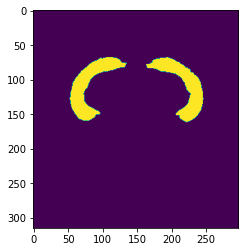

In [98]:
label = (label == 2).astype(int)
plt.imshow(label[slice_num])

In [105]:
itk_label = sitk.GetImageFromArray(label)

shape_stats = sitk.LabelShapeStatisticsImageFilter()

shape_stats.ComputeOrientedBoundingBoxOn()
#shape_stats.ComputeFeretDiameterOn()

shape_stats.Execute(itk_label)

In [106]:
stats_list = [(shape_stats.GetPhysicalSize(i),
               shape_stats.GetElongation(i),
               shape_stats.GetFlatness(i),
               shape_stats.GetRoundness(i),
               shape_stats.GetOrientedBoundingBoxSize(i)[0],
               shape_stats.GetOrientedBoundingBoxSize(i)[2]) for i in shape_stats.GetLabels()]

cols=["Volume (px^3)",
      "Elongation",
      "Flatness",
      "Roundness",
      "OBB Min Size(nm)",
      "OBB Max Size(nm)"]

# Create the pandas data frame and display descriptive statistics.
stats = pd.DataFrame(data=stats_list, index=shape_stats.GetLabels(), columns=cols)
stats

,Volume (px^3),Elongation,Flatness,Roundness,OBB Min Size(nm),OBB Max Size(nm)
1,32046.0,1.081460,4.479188,0.321643,39.640998,140.397826
2,460455.0,2.438373,1.235369,0.446032,88.551957,197.547543
3,290047.0,1.385579,1.537278,0.528810,69.275777,124.028933
4,377116.0,1.040414,1.788459,0.472703,78.137245,130.017882
5,540799.0,1.940991,2.503315,0.443981,60.390208,232.265096
6,149818.0,1.377125,1.606742,0.656094,55.382702,112.568968
7,1872.0,1.816877,1.300180,0.804128,14.436711,25.572786
8,14.0,1.966236,1.228915,0.902176,3.639974,5.865180
9,4723.0,6.236048,1.550774,0.575209,11.992315,74.354224
